# Bresenham Algorithmus
Der Bresenham Algorithmus ist ein grundlegendes Verfahren mit dem Ziel, eine gerade Linie zwischen zwei gegebenen Punkten zu zeichnen bzw. die hierfür zu füllenden Pixel zu errechnen. Im Folgenden soll die theoretische Grundlage praktisch umgesetzt werden. Hierfür wird zunächst das Verfahren für den ersten Oktanten dargestellt, anschließend auf den zweiten ausgeweitet und anschließend für jeglichen Linientypen geltend verallgemeinert.

## Oktant 1
### d_y <= d_x | 0 <= m <= 1

In [ ]:
! pip install ipycanvas

Zunächst werden die Anfangspunkte abgefragt:

In [ ]:
x_0 = int(input("x-Wert des ersten Punktes: "))
y_0 = int(input("y-Wert des ersten Punktes: "))
x_1 = int(input("x-Wert des zweiten Punktes: "))
y_1 = int(input("y-Wert des zweiten Punktes: "))

assert x_1 > x_0
assert y_1 > y_0

print(f"Punkte: P1({x_0}|{y_0}) und  P2({x_1}|{y_1})")

Nun werden der initiale Fehler sowie die hierfür und auch später relevanten Differenzen der x- und y-Werte bestimmt:

In [ ]:
d_x = x_1 - x_0 # Die Differenz der x-Werte wird errechnet, da dieser Wert in späteren Berechnungen benötigt wird.
d_y = y_1 - y_0 # Die Differenz der y-Werte wird errechnet, da dieser Wert in späteren Berechnungen benötigt wird.

assert d_y <= d_x

fehler = 2*d_y-d_x # Initialisierung der Entscheidungsvariable d0, hier bezeichnet als Fehler

Es folgt die Schleife, in welcher für alle x zwischen x_0 und x_1 der korrespondierende y-Wert, welcher die Linie am besten beschreibt, errechnet wird. 
In diesem Beispiel werden die Punkte als Tupel in eine Liste gespeichert, um sie später zu visualisieren.

In [ ]:
punkte = []

x = x_0
y = y_0

punkte.append((x,y))

while x < x_1:
    x+=1
    if fehler < 0:
        fehler += 2*d_y
    else:
        y += 1
        fehler += 2*(d_y-d_x)
    punkte.append((x,y))

print(punkte)

Zur Probe können nun die errechneten Punkte mithilfe von IPyCanvas dargestellt werden:

In [ ]:

from util import visualisations

util.zeichne_pixel(punkte)

## Oktant 2
### dy > dx | m > 1

Zunächst werden die Anfangspunkte abgefragt:

In [ ]:
x_0 = int(input("x-Wert des ersten Punktes: "))
y_0 = int(input("y-Wert des ersten Punktes: "))
x_1 = int(input("x-Wert des zweiten Punktes: "))
y_1 = int(input("y-Wert des zweiten Punktes: "))

assert x_1 > x_0
assert y_1 > y_0

print(f"Punkte: P1({x_0}|{y_0}) und  P2({x_1}|{y_1})")

Nun werden der initiale Fehler sowie die hierfür und auch später relevanten Differenzen der x- und y-Werte bestimmt:

In [ ]:
d_x = x_1 - x_0 # Die Differenz der x-Werte wird errechnet, da dieser Wert in späteren Berechnungen benötigt wird.
d_y = y_1 - y_0 # Die Differenz der y-Werte wird errechnet, da dieser Wert in späteren Berechnungen benötigt wird.

assert d_y > d_x

d_x, d_y = d_y, d_x # Rollen von x und y werden vertauscht -> grundlegender Prozess bleibt gleich, entspricht jedoch nun einer Spiegelung an f(x)=x

fehler = 2*d_y-d_x # Initialisierung der Entscheidungsvariable d0, hier bezeichnet als Fehler

Es folgt die Schleife, in welcher für alle x zwischen x_0 und x_1 der korrespondierende y-Wert, welcher die Linie am besten beschreibt, errechnet wird.
In diesem Beispiel werden die Punkte als Tupel in eine Liste gespeichert, um sie später zu visualisieren.

In [ ]:
punkte = []

x = x_0
y = y_0

punkte.append((x,y))

while y < y_1:
    y+=1
    if fehler < 0:
        fehler += 2*d_y
    else:
        x += 1
        fehler += 2*(d_y-d_x)
    punkte.append((x,y))

print(punkte)

Zur Probe können nun die errechneten Punkte mithilfe von IPyCanvas dargestellt werden:

In [ ]:
import util.visualisations as util

util.zeichne_pixel(punkte)

## Allgemeine Form
### anwendbar auf alle Oktanten

In [ ]:
x_0 = int(input("x-Wert des ersten Punktes: "))
y_0 = int(input("y-Wert des ersten Punktes: "))
x_1 = int(input("x-Wert des zweiten Punktes: "))
y_1 = int(input("y-Wert des zweiten Punktes: "))

if x_0 > x_1:
        x_0, x_1 = x_1, x_0 # x_0 stets kleiner x_1
        y_0, y_1 = y_1, y_0

d_x = abs(x_1 - x_0)
d_y = abs(y_1 - y_0)

Anschließend wird die entsprechend m ? 1 unterschieden. Im Folgenden wird je nach Oktant eine schnelle Richtung f_dir und eine langsame Richtung s_dir bestimmt, das anschließende Vorgehen beleibt jedoch grundlegend gleich.

In [ ]:
if d_x >= d_y: # 0 <= |m| <= 1
    f_dir = x_0
    s_dir = y_0
    d_n = 2*d_y - d_x

    result = [(f_dir, s_dir)]
    step = 1 if y_0 < y_1 else -1 # Berücksichtigung negativer Anstiege

    while f_dir < x_1:
        f_dir += 1
        if d_n < 0:
            d_n += 2 * d_y
        else:
            s_dir += step
            d_n += 2 * (d_y - d_x)
        result.append((f_dir, s_dir))
    print(result)

else: # 1 < m
    f_dir = y_0
    s_dir = x_0

    d_x, d_y = d_y, d_x

    d_n = 2 * d_y - d_x


    result = [(s_dir, f_dir)] # geändertes Format (siehe Zeile 6) --> Punkte bleiben x/y-Paare, f_dir und s_dir entsprechen jetzt y und x respektive
    step = 1 if y_0 < y_1 else -1 # Differenzierung je nach Vorzeichen des Anstieges

    while f_dir != y_1: # leicht modifizierte Schleifenbedingung, um positiven und negativen Anstieg abzudecken
        f_dir += step # Differenzierung je nach Vorzeichen des Anstieges
        if d_n < 0:
            d_n += 2 * d_y
        else:
            s_dir += 1 # Addition, da x_0 stets kleiner x_1
            d_n += 2 * (d_y - d_x)
        result.append((s_dir, f_dir))

    print(result)

In [ ]:
import util.visualisations

util.zeichne_pixel(punkte)

Der dargestellte Algorithmus findet sich in der Datei algorithms.py. Er deckt alle Möglichkeiten eines Anstieges einer Geraden zwischen zwei Punkten ab:

0.5
-0.5
-0.5
0.5
2.0
-2.0
-2.0
2.0


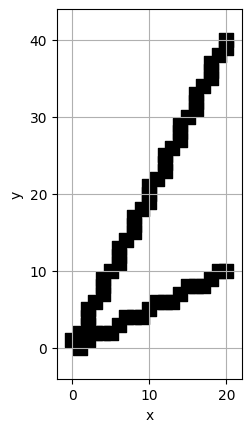

In [1]:
import util.visualisations as vis
from rasterisation_algs import dda_line
ax_0, ay_0, ax_1, ay_1 = 0, 0, 20, 10
bx_0, by_0, bx_1, by_1 = 0, 0, 20, 40
punkte = []
punkte.extend(dda_line(ax_0, ay_0, ax_1, ay_1))
punkte.extend(dda_line(ax_0, ay_0, -1 * ax_1, ay_1))
punkte.extend(dda_line(ax_0, ay_0, ax_1, -1 * ay_1))
punkte.extend(dda_line(ax_0, ay_0, -1 * ax_1, -1 * ay_1))

punkte.extend(dda_line(bx_0, by_0, bx_1, by_1))
punkte.extend(dda_line(bx_0, by_0, -1 * bx_1, by_1))
punkte.extend(dda_line(bx_0, by_0, bx_1, -1 * by_1))
punkte.extend(dda_line(bx_0, by_0, -1 * bx_1, -1 * by_1))

vis.plot_points(punkte)
